# Assignment 2

In [1]:
from scipy.special import beta
from functools import lru_cache

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

from tqdm.notebook import trange

np.random.seed(4878932)

# Ex 2: Plot the decision boundry

In [2]:
def A(x_1: float, x_2: float, p: float, alpha_0: float, beta_0: float, alpha_1: float, beta_1: float) -> float:
    return np.log((beta(alpha_0, beta_0) ** 2) / (beta(alpha_1, beta_1) ** 2)) + np.log(p/(1-p)) + (alpha_1 - alpha_0) * (np.log(x_1) + np.log(x_2)) + (beta_1 - beta_0)*(np.log(1-x_1) + np.log(1-x_2))

In [3]:
def f_star(x_1: float, x_2: float, p: float, alpha_0: float, beta_0: float, alpha_1: float, beta_1: float) -> float:
    return 1.0 if A(x_1, x_2, p, alpha_0, beta_0, alpha_1, beta_1) > 0 else 0.0

In [4]:
# Deze lijkt nog niet helemaal te kloppen
def generate_Y_X(n: int, p: float, alpha_0: float, beta_0: float, alpha_1: float, beta_1: float) -> np.ndarray:
    Y = sts.bernoulli.rvs(p, size=n)
    Y_0 = sts.beta.rvs(a=alpha_0, b=beta_0, size=(n, 2))
    Y_1 = sts.beta.rvs(a=alpha_1, b=beta_1, size=(n, 2))

    X = np.zeros((n, 2))
    X[Y == 0] = Y_0[Y == 0]
    X[Y == 1] = Y_1[Y == 1]

    return Y, X

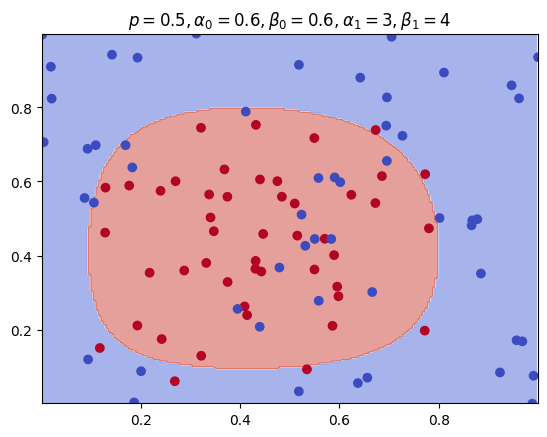

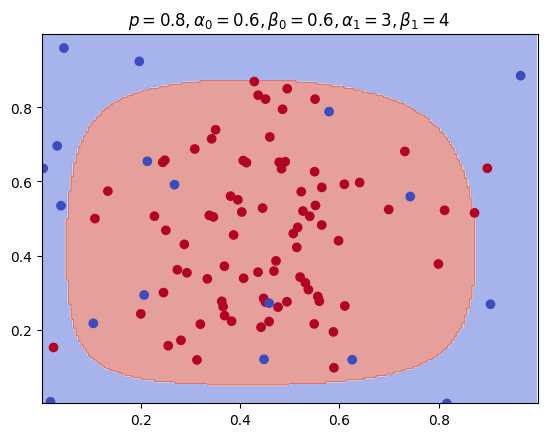

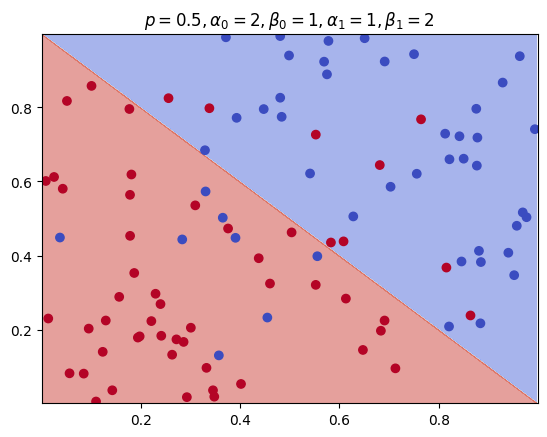

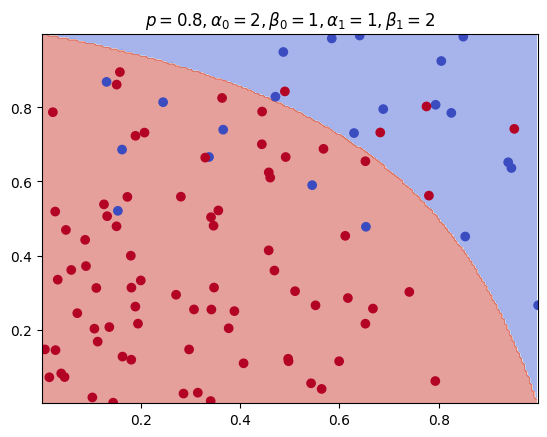

In [5]:
def plot_decision_boundry(p: float, alpha_0: float, beta_0: float, alpha_1: float, beta_1: float):
    h = 0.005
    n = 100
    x_min, x_max = 0.001, 0.999
    y_min, y_max = 0.001, 0.999

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xxyy = np.c_[xx.ravel(), yy.ravel()]

    Z = np.zeros(xxyy.shape[0])
    for idx, (x, y) in enumerate(xxyy):
        Z[idx] = f_star(x, y, p, alpha_0, beta_0, alpha_1, beta_1)
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    Y, X = generate_Y_X(n, p, alpha_0, beta_0, alpha_1, beta_1)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.title(f"$p={p}, \\alpha_0={alpha_0}, \\beta_0={beta_0}, \\alpha_1={alpha_1}, \\beta_1={beta_1}$")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

plot_decision_boundry(0.5, 0.6, 0.6, 3, 4)
plot_decision_boundry(0.8, 0.6, 0.6, 3, 4)
plot_decision_boundry(0.5, 2, 1, 1, 2)
plot_decision_boundry(0.8, 2, 1, 1, 2)
# Note red is 1

# Ex 3: Approximating Bayes-risk

In [6]:
n_tilde = 1_000_000
p = 0.5
alpha_0 = 0.6
beta_0 = 0.6
alpha_1 = 3
beta_1 = 4

Y_gen, X_gen = generate_Y_X(n_tilde, p, alpha_0, beta_0, alpha_1, beta_1)

In [7]:
# Hoe grappig zou het zijn als ik dit allemaal op 1 regel zet, want dat kan wel
f_star_X = np.array([0 if f_star(x, y, p, alpha_0, beta_0, alpha_1, beta_1) == Y_gen[i] else 1 for i, (x, y) in enumerate(X_gen)])
bayes_risk = f_star_X.mean()
bayes_risk.round(5)

0.17659

If p increases we will have more datapoints 1, which are more centered overall, this should increase the region in which you believe that a value is from 1. However since 0 is still very much everywhere on the plane, you are likely to have a higher risk.

## Ex. 4: ERM

In [8]:
Y_gen_4, X_gen_4 = generate_Y_X(100, p, alpha_0, beta_0, alpha_1, beta_1)

In [9]:
# @lru_cache
def hist_fit(X, y, r): 
    """
    Purpose:
    Fit a histogram in [0,1]^2 with r∗r bins
    Inputs:
    X matrix, n x 2 matrix with sample of feature vectors
    y vector, n−dimensional vector containing labels corresponding to X r int , number of bins per feature
    Return value:
    pred_mat matrix, r x r matrix of predicted label per cell of histogram partition edges matrix, 2 x (r + 1) matrix containing boundaries of cells of partition
    """
    hist1, edges = np.histogramdd(X[y == 1,:], bins=r, range=([0,1],[0,1])) 
    hist0, _ = np.histogramdd(X[y == 0,:], bins=r, range=([0,1],[0,1])) 
    pred_mat = (hist1 > hist0)
    return pred_mat , edges

In [10]:
def f_ERM(x_1: float, x_2: float, r: int, Z, x_loc, y_loc):
    x = np.argwhere(x_loc < x_1)[-1]
    y = np.argwhere(y_loc < x_2)[-1]
    return Z[x, y][-1]

Emperical risk: 0.18


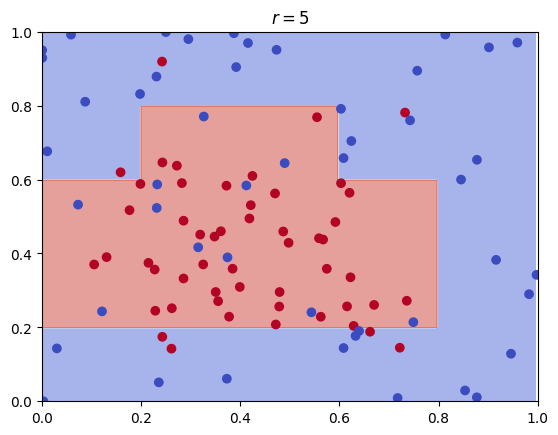

Emperical risk: 0.14


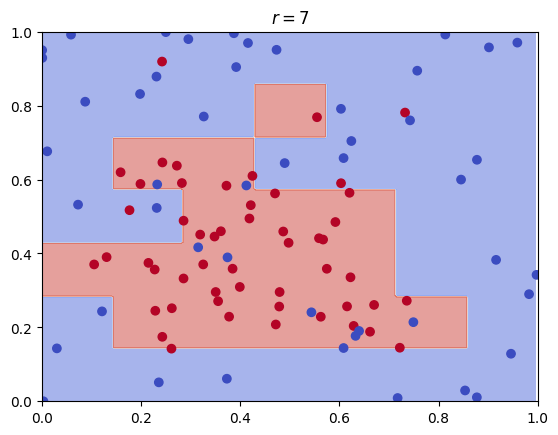

Emperical risk: 0.1


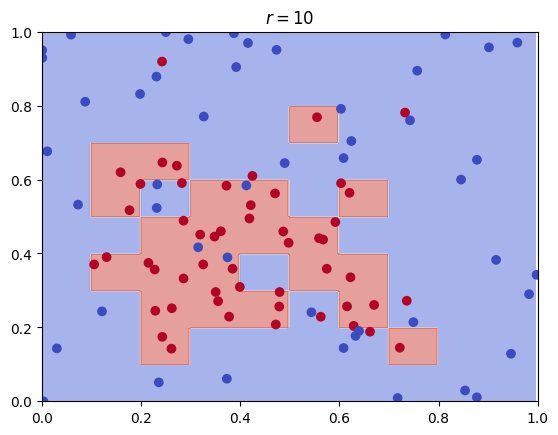

Emperical risk: 0.03


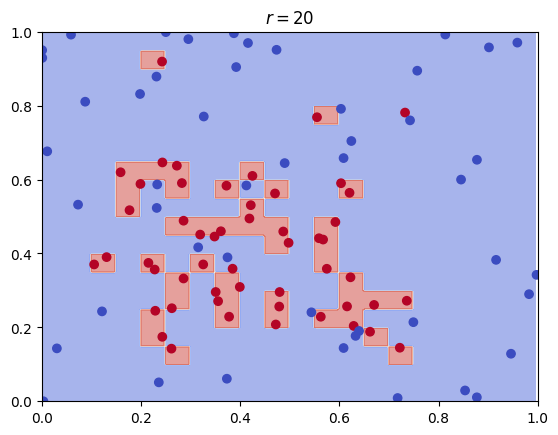

In [11]:
def plot_ERM_pred(r: int):
    ret_val, (x_loc, y_loc) = hist_fit(X_gen_4, Y_gen_4, r)
    q4_models.append((ret_val, x_loc, y_loc))
    h = 0.005
    n = 100
    x_min, x_max = 0.001, 0.999
    y_min, y_max = 0.001, 0.999

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xxyy = np.c_[xx.ravel(), yy.ravel()]

    Z = np.zeros(xxyy.shape[0])
    for idx, (x, y) in enumerate(xxyy):
        Z[idx] = f_ERM(x, y, r, ret_val, x_loc, y_loc)

    emp_risk_train = np.array([0 if f_ERM(x, y, r, ret_val, x_loc, y_loc) == Y_gen_4[i] else 1 for i, (x, y) in enumerate(X_gen_4)]).mean()
    print(f"Emperical risk: {emp_risk_train}")

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_gen_4[:, 0], X_gen_4[:, 1], c=Y_gen_4, cmap=plt.cm.coolwarm)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f"$r={r}$")
    plt.show()

q4_models = []
plot_ERM_pred(5)
plot_ERM_pred(7)
plot_ERM_pred(10)
plot_ERM_pred(20)

# Note that our results included in the pdf document are from a different simulation than the one included in this document

# Ex. 5: Approximate approximation error

r: 5, emperical risk = 0.21373, approximation error = 0.03714
Emperical risk: 0.23


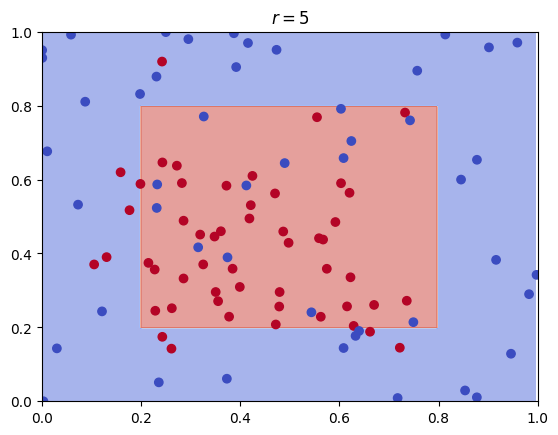

r: 7, emperical risk = 0.18874, approximation error = 0.01214
Emperical risk: 0.2


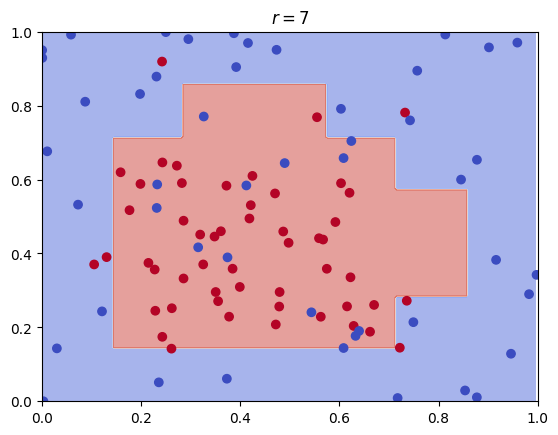

r: 10, emperical risk = 0.17894, approximation error = 0.00235
Emperical risk: 0.17


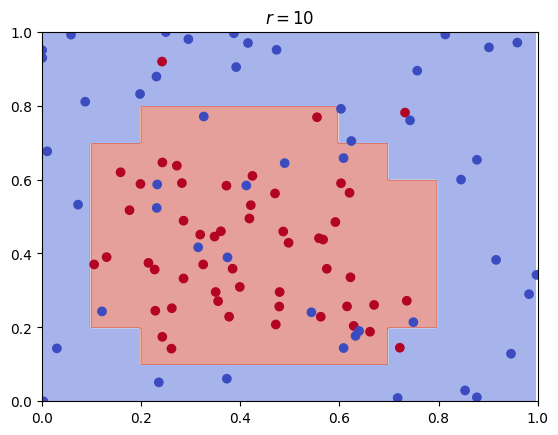

r: 20, emperical risk = 0.17744, approximation error = 0.00085
Emperical risk: 0.18


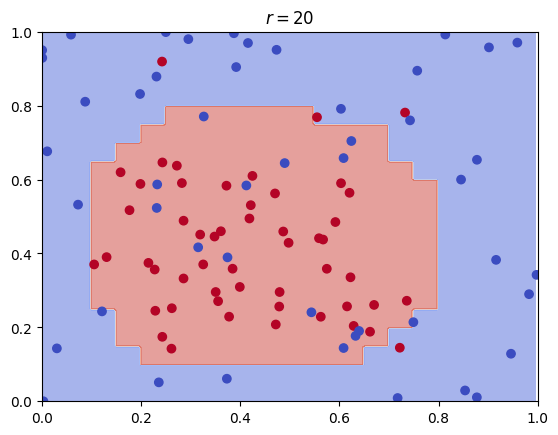

In [12]:
@lru_cache # This just makes it easier to program without creating some sort of array # Looking at it for a second time, this is very unnneccsary, but still cool
def approx_inf_form(r: int):
    ret_val, (x_loc, y_loc) = hist_fit(X_gen, Y_gen, r)
    emp_risk = np.array([0 if f_ERM(x, y, r, ret_val, x_loc, y_loc) == Y_gen[i] else 1 for i, (x, y) in enumerate(X_gen)]).mean()
    print(f"r: {r}, emperical risk = {emp_risk.round(5)}, approximation error = {(emp_risk - bayes_risk).round(5)}")
    return emp_risk

def plot_ERM_pred_q5(r: int):
    ret_val, (x_loc, y_loc) = hist_fit(X_gen, Y_gen, r)
    q4_models.append((ret_val, x_loc, y_loc))
    h = 0.005
    n = 1_000_000
    x_min, x_max = 0.001, 0.999
    y_min, y_max = 0.001, 0.999

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xxyy = np.c_[xx.ravel(), yy.ravel()]

    Z = np.zeros(xxyy.shape[0])
    for idx, (x, y) in enumerate(xxyy):
        Z[idx] = f_ERM(x, y, r, ret_val, x_loc, y_loc)

    emp_risk_train = np.array([0 if f_ERM(x, y, r, ret_val, x_loc, y_loc) == Y_gen_4[i] else 1 for i, (x, y) in enumerate(X_gen_4)]).mean()
    print(f"Emperical risk: {emp_risk_train}")

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_gen_4[:, 0], X_gen_4[:, 1], c=Y_gen_4, cmap=plt.cm.coolwarm)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f"$r={r}$")
    plt.show()
    
r5_emp_risk = approx_inf_form(5)
plot_ERM_pred_q5(5)
r7_emp_risk = approx_inf_form(7)
plot_ERM_pred_q5(7)
r10_emp_risk = approx_inf_form(10)
plot_ERM_pred_q5(10)
r20_emp_risk = approx_inf_form(20)
plot_ERM_pred_q5(20)

## Ex. 6: approximate estimation error

In [14]:
q4_r5_model = q4_models[0]
q4_r7_model = q4_models[1]
q4_r10_model = q4_models[2]
q4_r20_model = q4_models[3]

r5_q4_emp_risk = np.array([0 if f_ERM(x, y, 5, *q4_r5_model) == Y_gen[i] else 1 for i, (x, y) in enumerate(X_gen)]).mean()
r7_q4_emp_risk = np.array([0 if f_ERM(x, y, 5, *q4_r7_model) == Y_gen[i] else 1 for i, (x, y) in enumerate(X_gen)]).mean()
r10_q4_emp_risk = np.array([0 if f_ERM(x, y, 5, *q4_r10_model) == Y_gen[i] else 1 for i, (x, y) in enumerate(X_gen)]).mean()
r20_q4_emp_risk = np.array([0 if f_ERM(x, y, 5, *q4_r20_model) == Y_gen[i] else 1 for i, (x, y) in enumerate(X_gen)]).mean()

In [15]:
r5_q5_est_error = r5_q4_emp_risk - r5_emp_risk
r7_q5_est_error = r7_q4_emp_risk - r7_emp_risk
r10_q5_est_error = r10_q4_emp_risk - r10_emp_risk
r20_q5_est_error = r20_q4_emp_risk - r20_emp_risk

In [16]:
print(f"r = 5: Q4 emperical risk = {r5_emp_risk}, Estimation error = {r5_q5_est_error}")
print(f"r = 7: Q4 emperical risk = {r7_emp_risk}, Estimation error = {r7_q5_est_error}")
print(f"r = 10: Q4 emperical risk = {r10_emp_risk}, Estimation error = {r10_q5_est_error}")
print(f"r = 20: Q4 emperical risk = {r20_emp_risk}, Estimation error = {r20_q5_est_error}")

r = 5: Q4 emperical risk = 0.213731, Estimation error = 0.0065769999999999995
r = 7: Q4 emperical risk = 0.188736, Estimation error = 0.05335300000000001
r = 10: Q4 emperical risk = 0.178937, Estimation error = 0.11761499999999997
r = 20: Q4 emperical risk = 0.17744, Estimation error = 0.22268


In [21]:
print(f"r = 5: Excess risk = {(r5_q5_est_error + 0.03714).round(5)}")
print(f"r = 7: Excess risk = {(r7_q5_est_error + 0.01214).round(5)}")
print(f"r = 10: Excess risk = {(r10_q5_est_error + 0.00235).round(5)}")
print(f"r = 20: Excess risk = {(r20_q5_est_error + 0.00085).round(5)}")

r = 5: Excess risk = 0.04372
r = 7: Excess risk = 0.06549
r = 10: Excess risk = 0.11996
r = 20: Excess risk = 0.22353


## Ex. 7: Analyze the risk
No code needed.

## Ex. 8: Difficult appearing questions
No code needed.

## Ex. 9: Approximate estimation error (again)

In [ ]:
N = 100
r_q9 = 5
est_risk_array = np.zeros(N)

for i in trange(N):
    Y_gen_9, X_gen_9 = generate_Y_X(100, p, alpha_0, beta_0, alpha_1, beta_1)
    ret_val, (x_loc, y_loc) = hist_fit(X_gen_9, Y_gen_9, r_q9)
    est_risk_array[i] = np.array([0 if f_ERM(x, y, 5, ret_val, x_loc, y_loc) == Y_gen[i] else 1 for i, (x, y) in enumerate(X_gen)]).mean()

  0%|          | 0/100 [00:00<?, ?it/s]

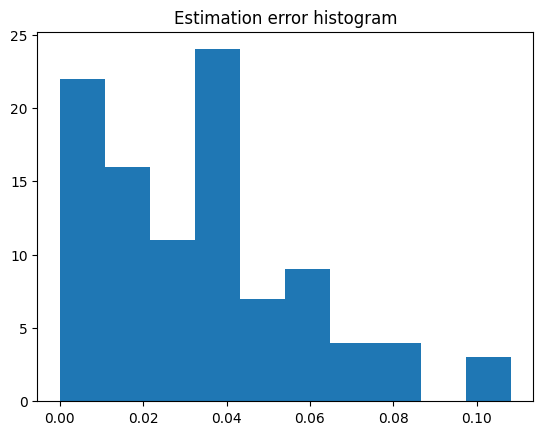

In [ ]:
diff = est_risk_array - r5_emp_risk

plt.hist(diff)
plt.title("Estimation error histogram")
plt.show()

In [ ]:
# Just because I don't want to run it again.
with open('est_risk.npy', 'wb') as f:
    np.save(f, est_risk_array)

Hij komt nooit boven de 99% uit.